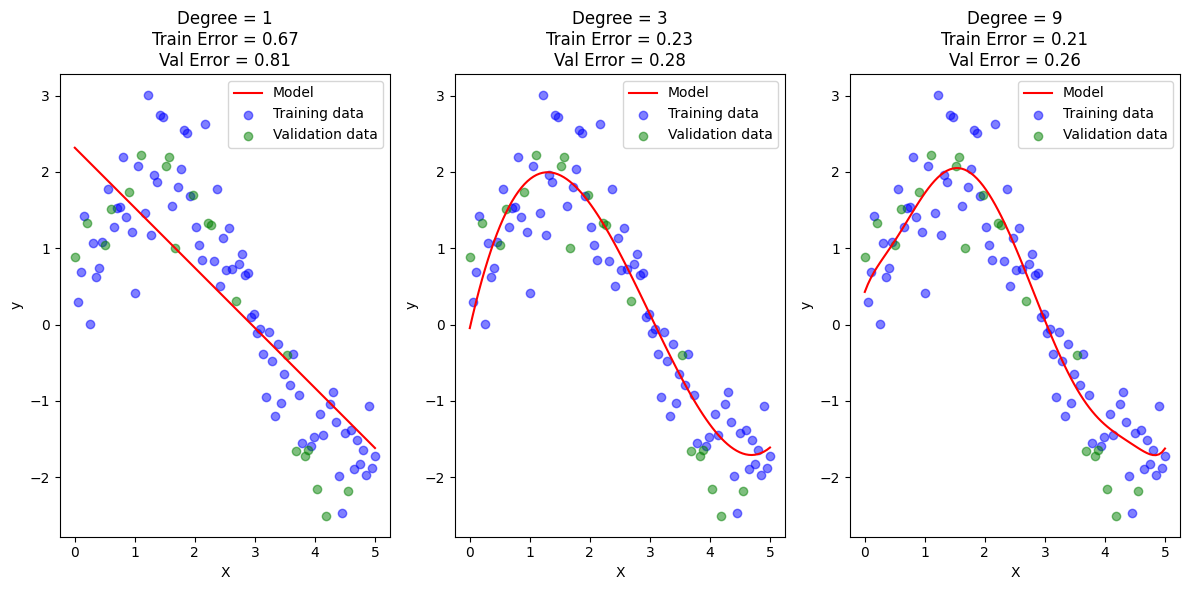

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 5, 100)
y = 2 * np.sin(X) + np.random.normal(0, 0.5, 100)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define degrees of polynomial features
degrees = [1, 3, 9]

# Plot training and validation curves for different degrees of polynomial features
plt.figure(figsize=(12, 6))
for i, degree in enumerate(degrees):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train[:, np.newaxis], y_train)
    
    # Compute training and validation errors
    train_error = mean_squared_error(y_train, model.predict(X_train[:, np.newaxis]))
    val_error = mean_squared_error(y_val, model.predict(X_val[:, np.newaxis]))
    
    # Plot training and validation curves
    plt.subplot(1, len(degrees), i + 1)
    plt.plot(X, model.predict(X[:, np.newaxis]), label='Model', color='r')
    plt.scatter(X_train, y_train, label='Training data', color='b', alpha=0.5)
    plt.scatter(X_val, y_val, label='Validation data', color='g', alpha=0.5)
    plt.title(f'Degree = {degree}\nTrain Error = {train_error:.2f}\nVal Error = {val_error:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()

plt.tight_layout()
plt.show()


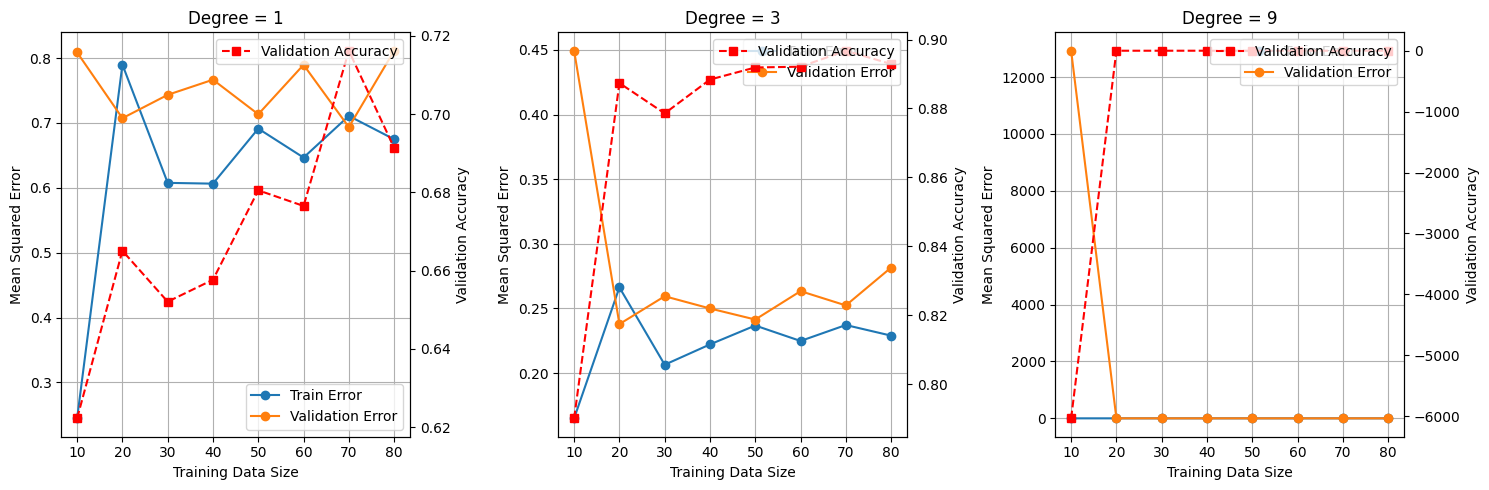

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

# Generate sample data
np.random.seed(0)
X = np.linspace(0, 5, 100)
y = 2 * np.sin(X) + np.random.normal(0, 0.5, 100)

# Varying sizes of training data
train_sizes = [10, 20, 30, 40, 50, 60, 70, 80]
degrees = [1, 3, 9]

plt.figure(figsize=(15, 5))

for i, degree in enumerate(degrees):
    train_errors = []
    val_errors = []
    final_val_acc = []
    
    for size in train_sizes:
        # Split data into training and validation sets
        X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=size, random_state=42)
        
        # Create polynomial regression model
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
        model.fit(X_train[:, np.newaxis], y_train)
        
        # Compute training and validation errors
        train_error = mean_squared_error(y_train, model.predict(X_train[:, np.newaxis]))
        val_error = mean_squared_error(y_val, model.predict(X_val[:, np.newaxis]))
        
        # Store errors
        train_errors.append(train_error)
        val_errors.append(val_error)
        
        # Calculate final validation accuracy
        final_val_acc.append(model.score(X_val[:, np.newaxis], y_val))
        
    # Plot training and validation errors
    plt.subplot(1, len(degrees), i + 1)
    plt.plot(train_sizes, train_errors, label='Train Error', marker='o')
    plt.plot(train_sizes, val_errors, label='Validation Error', marker='o')
    plt.title(f'Degree = {degree}')
    plt.xlabel('Training Data Size')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.grid(True)
    
    # Plot final validation accuracy and indicate underfitting, optimal, or overfitting
    plt.twinx()
    plt.plot(train_sizes, final_val_acc, label='Validation Accuracy', color='r', linestyle='--', marker='s')
    plt.ylabel('Validation Accuracy')
    plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [1]:
import joblib

# Define your data
X_train = [[1], [2], [3]]
y_train = [2, 3, 4]

# Train a simple linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'simple_model.pkl')


['simple_model.pkl']